# Interface 2018/12 Snack sound classification

Classification task of 6 snack bag shaking sounds.

https://shop.cqpub.co.jp/hanbai/books/MIF/MIF201812.html

The dataset has sounds recorded by 5 different microphones.

- Trained with all training set.
- Evaluated against entire validation set as well as each microphone set.

In [1]:
import sys
sys.path.append('../..')
from lib_train import *
import matplotlib.pyplot as plt
%matplotlib inline
from ext.projectml import ProjectML

{'sampling_rate': 44100, 'duration': 2, 'hop_length': 694, 'fmin': 20, 'fmax': 22050, 'n_mels': 128, 'n_fft': 2560, 'model': 'mobilenetv2', 'labels': ['babystar', 'bbq', 'corn', 'kappaebi', 'potechi', 'vegetable'], 'folder': PosixPath('.'), 'n_fold': 1, 'valid_limit': None, 'random_state': 42, 'test_size': 0.2, 'samples_per_file': 1, 'batch_size': 32, 'learning_rate': 0.0001, 'metric_save_ckpt': 'val_acc', 'epochs': 100, 'verbose': 2, 'best_weight_file': 'best_model_weight.h5', 'rt_process_count': 1, 'rt_oversamples': 10, 'pred_ensembles': 10, 'runtime_model_file': None, 'label2int': {'babystar': 0, 'bbq': 1, 'corn': 2, 'kappaebi': 3, 'potechi': 4, 'vegetable': 5}, 'num_classes': 6, 'samples': 88200, 'rt_chunk_samples': 4410, 'mels_onestep_samples': 4410, 'mels_convert_samples': 92610, 'dims': [128, 128, 1], 'metric_save_mode': 'auto', 'logdir': 'logs', 'data_balancing': 'over_sampling', 'X_train': 'X_train.npy', 'y_train': 'y_train.npy', 'X_test': 'X_test.npy', 'y_test': 'y_test.npy',

Using TensorFlow backend.


In [2]:
import keras

# def project_setup(pj):
conf.model = 'alexnet'
conf.epochs = 50
conf.metric_save_ckpt = 'val_acc'
conf.data_balancing = 'by_generator'
conf.batch_size = conf.num_classes * 2
conf.test_size = 0.2

# def cycle_setup_data(pj):
X_train = np.load('X_train.npy')
y_train = keras.utils.to_categorical(np.load('y_train.npy'))
X_valid = np.load('X_valid.npy')
y_valid = keras.utils.to_categorical(np.load('y_valid.npy'))
samplewise_normalize_audio_X(X_train)
samplewise_normalize_audio_X(X_valid)

In [3]:
# def cycle_train_model(pj):
_, model = train_classifier(conf, fold=0,
                            dataset=[X_train, y_train, X_valid, y_valid],
                            model=None,
                            init_weights='../../model/alexbased_small_fsd2018_41cls.h5')

model.load_weights(conf.best_weight_file)

 Dataset is not balanced so far, conf.data_balancing = by_generator
 Using normal data generator, with class balancing
 train_steps_per_epoch, 400
Model: AlexNet based
Loading weights: ../../model/alexbased_small_fsd2018_41cls.h5
Epoch 1/50
 - 6s - loss: 1.8085 - acc: 0.1888 - val_loss: 1.7913 - val_acc: 0.1949

Epoch 00001: val_acc improved from -inf to 0.19486, saving model to best_model_weight.h5
Epoch 2/50
 - 6s - loss: 1.7202 - acc: 0.2756 - val_loss: 1.5333 - val_acc: 0.4295

Epoch 00002: val_acc improved from 0.19486 to 0.42952, saving model to best_model_weight.h5
Epoch 3/50
 - 6s - loss: 1.5483 - acc: 0.3946 - val_loss: 1.4211 - val_acc: 0.4784

Epoch 00003: val_acc improved from 0.42952 to 0.47844, saving model to best_model_weight.h5
Epoch 4/50
 - 6s - loss: 1.2944 - acc: 0.5467 - val_loss: 0.8739 - val_acc: 0.7197

Epoch 00004: val_acc improved from 0.47844 to 0.71973, saving model to best_model_weight.h5
Epoch 5/50
 - 6s - loss: 1.2216 - acc: 0.5912 - val_loss: 1.6024 - va

## Evaluation

In [3]:
conf.epochs = 0
_, model = train_classifier(conf, fold=0,
                            dataset=[X_train, y_train, X_valid, y_valid],
                            model=None,
                            init_weights=conf.best_weight_file)
mic_valid = np.load('mic_valid.npy')

 Dataset is not balanced so far, conf.data_balancing = by_generator
 Using normal data generator, with class balancing
 train_steps_per_epoch, 400
Model: AlexNet based
Loading weights: best_model_weight.h5


F1/Recall/Precision/Accuracy = 0.9057/0.9063/0.9101/0.9063


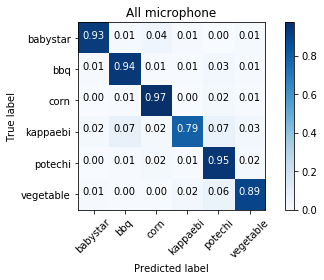

In [4]:
y_pred = model.predict(X_valid)
print_metrics(conf, y_pred, y_valid)
plt.show()
plot_confusion_matrix(y_pred, y_valid, classes=conf.labels, title='All microphone')

jack) reference acc=91.10 F1/Recall/Precision/Accuracy = 0.9453/0.9454/0.9458/0.9454


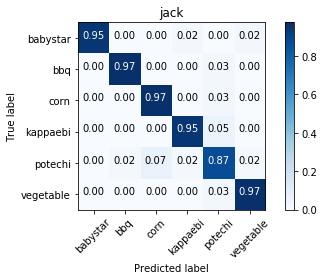

laptop) reference acc=94.00 F1/Recall/Precision/Accuracy = 0.9785/0.9786/0.9794/0.9786


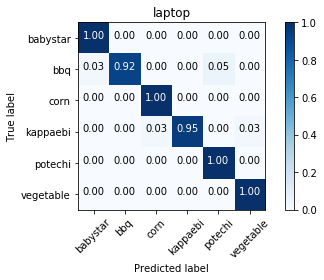

smartphone) reference acc=84.10 F1/Recall/Precision/Accuracy = 0.8657/0.8664/0.8742/0.8664


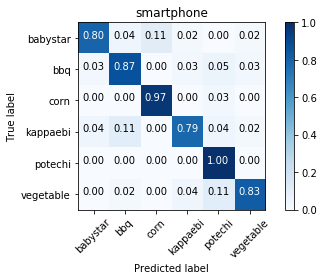

usb) reference acc=88.80 F1/Recall/Precision/Accuracy = 0.8603/0.8601/0.8793/0.8601


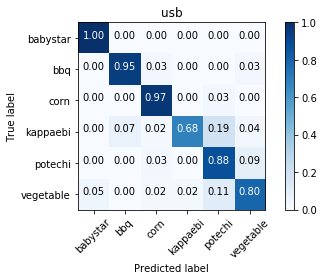

voicerecorder) reference acc=86.70 F1/Recall/Precision/Accuracy = 0.8820/0.8852/0.8938/0.8852


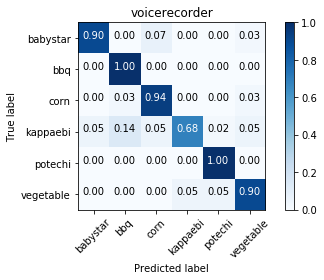

In [5]:
for mic, ref_acc in zip(['jack', 'laptop', 'smartphone', 'usb', 'voicerecorder'],
                        [91.1, 94, 84.1, 88.8, 86.7]):
    index = np.where(mic_valid == mic)
    y_p = y_pred[index]
    y_v = y_valid[index]
    print_metrics(conf, y_p, y_v, title_prefix=mic+') reference acc=%.2f '%ref_acc)
    plot_confusion_matrix(y_p, y_v, classes=conf.labels, title=mic)
    plt.show()